# Day28 BS4: Scrape from Youtube 2/2 
# 用美麗的湯爬取Youtube 2/2

延續昨日的文章，今天要把[Berge](http://www.hoertberge.de/)的Youtube搜尋頁面縮圖連結存下來。<br>
Today we will continue last article to scrape the thumbnail URLs from the search result of [Berge](http://www.hoertberge.de/) on Youtube.

In [1]:
# 同昨天的起始步驟，載入套件、創建美麗湯物件
# Same set up steps as yesterday, import packages, set up a beautiful soup object
import requests
from bs4 import BeautifulSoup

url = "https://www.youtube.com/results?search_query=Berge"
request = requests.get(url)
content = request.content
soup = BeautifulSoup(content, "html.parser")

In [2]:
# 印出標題以及URL，點開對照確認抓取的資料無誤
# print out titles and URLs to check that we have the correct URLs scraped
for vid in soup.select(".yt-lockup-video"):
    data = vid.select("a[rel='spf-prefetch']")
    print(data[0].get("title"))
    img = vid.select("img")
    if img[0].get("src") != "/yts/img/pixel-vfl3z5WfW.gif":
        print(img[0].get("src"))
    else:
        print(img[0].get("data-thumb"))
    print("-------------------")

Berge - Tour Tagebuch 2019 - Hannover
https://i.ytimg.com/vi/jff1KNRhtZo/hqdefault.jpg?sqp=-oaymwEjCPYBEIoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLBHp-CWkhpyiSuHrdsmc9jY9XPQNg
-------------------
Berge - Für die Liebe (Unplugged)
https://i.ytimg.com/vi/GAhWN9zmEV0/hqdefault.jpg?sqp=-oaymwEjCPYBEIoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLBaQ2clK5PH4qRppWrYkaNKvoHbaQ
-------------------
Berge - Mein Lied (Offizielles Musikvideo)
https://i.ytimg.com/vi/OGm3j3Qbipc/hqdefault.jpg?sqp=-oaymwEjCPYBEIoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLBx19yQU00p1AxODiUylUfZEExudQ
-------------------
Berge - Trau Dich (Offizielles Video)
https://i.ytimg.com/vi/HCdnECKWIZ8/hqdefault.jpg?sqp=-oaymwEjCPYBEIoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDNJnQemaJk6IrbKLGW5wh46qogaw
-------------------
Berge - Wir sind frei (Videoclip)
https://i.ytimg.com/vi/pZ7HyHKkuuI/hqdefault.jpg?sqp=-oaymwEjCPYBEIoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLBAJvcy787B_NSzPwu6VeNq

In [3]:
# 把我們抓取到的URL存成清單以利稍後加入昨天的資料框架中
# save the URLs into a list so we can then add them into the dataframe we created yesterday

img_url = []
for vid in soup.select(".yt-lockup-video"):
    img = vid.select("img")
    # 發現如果src="/yts/img/pixel-vfl3z5WfW.gif"，URL是存在data-thumb；否則就是直接存在src
    # if the src="/yts/img/pixel-vfl3z5WfW.gif", URLs are in data-thumb. otherwise it's in src
    if img[0].get("src") != "/yts/img/pixel-vfl3z5WfW.gif":
        img_url.append(img[0].get("src"))
    else:
        img_url.append(img[0].get("data-thumb"))
print(img_url[:3])

['https://i.ytimg.com/vi/jff1KNRhtZo/hqdefault.jpg?sqp=-oaymwEjCPYBEIoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLBHp-CWkhpyiSuHrdsmc9jY9XPQNg', 'https://i.ytimg.com/vi/GAhWN9zmEV0/hqdefault.jpg?sqp=-oaymwEjCPYBEIoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLBaQ2clK5PH4qRppWrYkaNKvoHbaQ', 'https://i.ytimg.com/vi/OGm3j3Qbipc/hqdefault.jpg?sqp=-oaymwEjCPYBEIoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLBx19yQU00p1AxODiUylUfZEExudQ']


## 把縮圖連結加入昨天的資料框架中存成csv檔
Save the url of the thumbnails with the dataframe we created yesterday and save as a new file.

In [4]:
import pandas as pd 
# 讀入昨天存的檔案來分析 read in the file we created yesterday
berge = pd.read_csv('berge.csv') 
berge.info() # 查看資料細節 the info of data
berge.head(3) # 叫出前三筆資料看看 print out the top three rows of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
Unnamed: 0      19 non-null int64
Title           19 non-null object
Uploaded        19 non-null object
Watch_Counts    19 non-null object
Description     19 non-null object
Link            19 non-null object
dtypes: int64(1), object(5)
memory usage: 1.0+ KB


,Unnamed: 0,Title,Uploaded,Watch_Counts,Description,Link
0,0,Berge - Für die Liebe (Unplugged),1 年前,"觀看次數：2,999,193次","Das neue Berge Album ""Für die Liebe"" ist ab je...",https://www.youtube.com/watch?v=GAhWN9zmEV0
1,1,Berge - Mein Lied (Offizielles Musikvideo),2 個月前,"觀看次數：229,689次","Mein Lied' und das Album ,Für die Liebe' zum V...",https://www.youtube.com/watch?v=OGm3j3Qbipc
2,2,🌟 Sander Berge 2018 ● Skills & Passes ● Genk,12 個月前,"觀看次數：18,959次",Video of Sander Berge and his Dribbling Skills...,https://www.youtube.com/watch?v=K9RJ0MG765E


In [5]:
berge['Img_URL'] = img_url # 新增欄位 add the ima_url as a new column 
berge.head(3)

,Unnamed: 0,Title,Uploaded,Watch_Counts,Description,Link,Img_URL
0,0,Berge - Für die Liebe (Unplugged),1 年前,"觀看次數：2,999,193次","Das neue Berge Album ""Für die Liebe"" ist ab je...",https://www.youtube.com/watch?v=GAhWN9zmEV0,https://i.ytimg.com/vi/jff1KNRhtZo/hqdefault.j...
1,1,Berge - Mein Lied (Offizielles Musikvideo),2 個月前,"觀看次數：229,689次","Mein Lied' und das Album ,Für die Liebe' zum V...",https://www.youtube.com/watch?v=OGm3j3Qbipc,https://i.ytimg.com/vi/GAhWN9zmEV0/hqdefault.j...
2,2,🌟 Sander Berge 2018 ● Skills & Passes ● Genk,12 個月前,"觀看次數：18,959次",Video of Sander Berge and his Dribbling Skills...,https://www.youtube.com/watch?v=K9RJ0MG765E,https://i.ytimg.com/vi/OGm3j3Qbipc/hqdefault.j...


In [6]:
berge.to_csv('berge_final.csv') # 儲存新的csv檔 save the new file

## 來看看這些縮圖
Have a look at the thumbnails

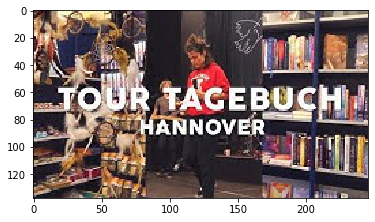

In [8]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 取得連結 get the link of URLs
response = requests.get(img_url[0]) 
img = Image.open(BytesIO(response.content)) 

# 轉成Numpy陣列等等要繪圖 convert img to numpy array so we can then plot them out
img = np.array(img)
plt.imshow(img)
plt.show()

In [9]:
# 把URL都轉成陣列並存進清單 convert all the URLs into Numpy array then append into a list
thumbnail = []
for u in img_url:
    response = requests.get(u)
    try:
        img = Image.open(BytesIO(response.content))

    except OSError:
        continue
    img = np.array(img)
    thumbnail.append(img)

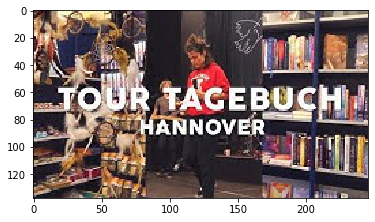

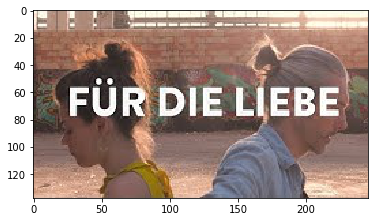

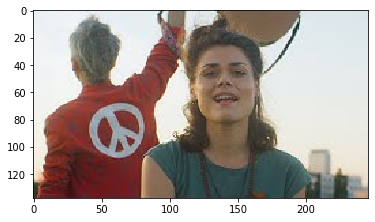

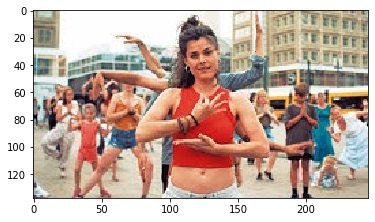

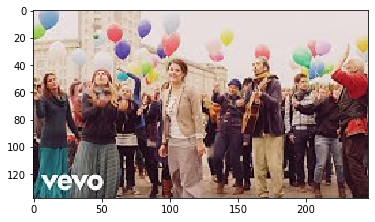

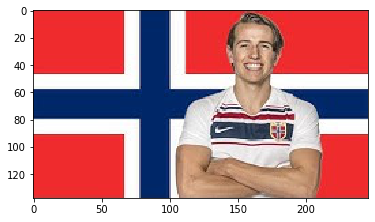

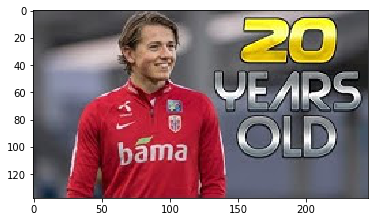

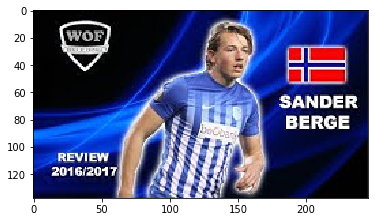

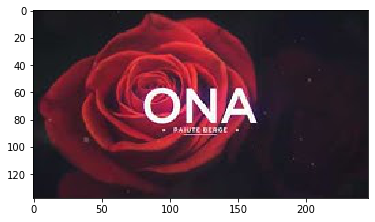

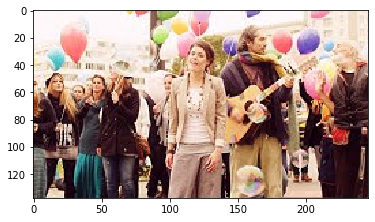

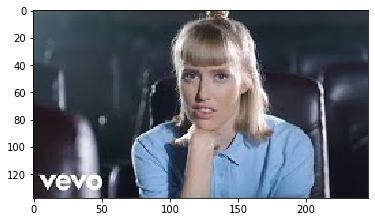

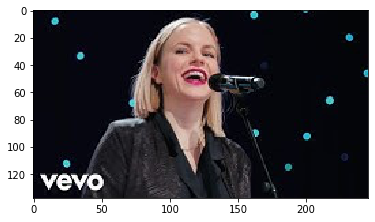

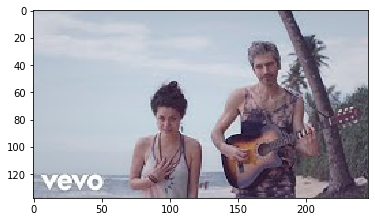

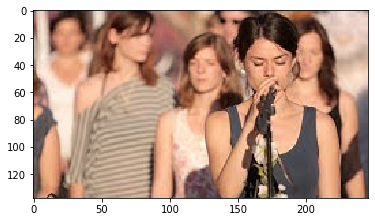

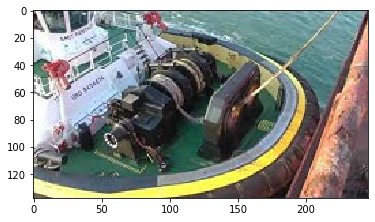

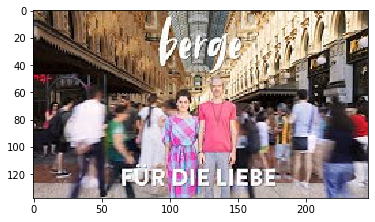

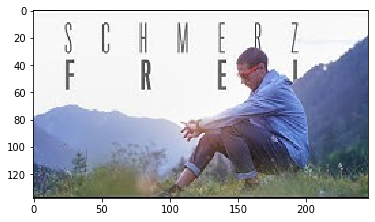

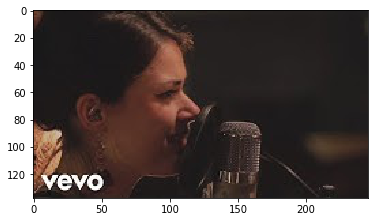

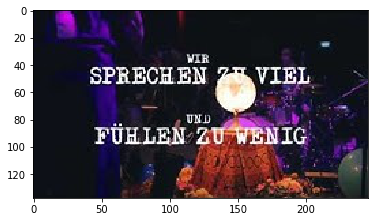

In [10]:
for t in thumbnail:
    plt.imshow(t)
    plt.show()

文中若有錯誤還望不吝指正，感激不盡。
Please let me know if there’s any mistake in this article. Thanks for reading.

Reference 參考資料：

[1] [Beautiful Soup 4.2.0](https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html)

[2] [爬蟲實戰-Youtube](https://hiskio.com/courses/112/lectures/3157)

[3] [Youtube](https://www.youtube.com/results?search_query=Berge)

[4] [IndexError](https://blog.csdn.net/qq_33731081/article/details/84788473)

[5] 第二屆機器學習百日馬拉松內容

[6] [Adding new column to existing DataFrame in Pandas](https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/)